# Welcome to Recitation 


## Case Background
In this lab, we continue the analysis of the casting problem. Recall that, as part of a longer
manufacturing process, a factory needs to cast a large number of rectangular metallic blocks.
The blocks are manufactured using a mold, consisting of the main cavity, a cup through
which the molten metal is poured, and two risers for cooling. The size and shape of the
pouring cup and risers affect how quickly the metal can be poured into the mold, how
quickly it cools, and whether it sets correctly.

## Objective
The factory needs to cast batches of 100 blocks of size 4.5×4.5×7 inches. The
current casting approach is conservative – it takes a long time to pour, but the blocks
always set correctly and are usable. Your goal is to achieve a significant reduction in
average casting time while still ensuring that most blocks are usable.



## Variables characterizing the mold

The following nine mold-variables can be varied:
Riser Height, Riser Diameter, Riser 1 Position, Riser 2 Position, Gate Diameter,
Cup Height, Sprue Height, Sprue Diameter Bottom, Sprue Diameter Top.

## Data

To obtain data on how various mold-variable settings affect pouring and cooling, a batch of 100 is poured with random variations in the nine mold-variables, centered about their baseline values. The data is available in castdata.csv. Use the same file as the previous recitation. As before, the first nine columns are the mold-variables listed above and the 10th column is `BatchTime` and the 11th column is `Feasible`. `Feasible` is 1 if the casting is feasible and 0 otherwise.

## ASSIGNMENT

This lab project will guide you through the analysis. First, we must import castdata.csv into the notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
df = pd.read_csv('castdata.csv')
df.head() # view the data

,GateDiam,CupHeight,SprueHeight,RiserDiam,SprueDiamBot,SprueDiamTop,RiserHeight,Riser1Pos,Riser2Pos,BatchTime,Feasible
0,0.500000,5.000000,10.000000,7.000000,0.500000,0.750000,5.000000,3.500000,5.000000,3031.292318,1
1,0.318317,5.604768,10.148839,6.745247,0.635632,0.889822,5.318354,3.168774,5.233322,3042.417820,0
2,0.353834,5.846289,9.528183,7.345273,0.642489,1.005683,4.836570,3.265961,5.482437,3050.300487,1
3,0.596163,4.280124,10.887751,6.952856,0.317180,0.589558,5.492964,4.029533,4.719791,3034.202547,1
4,0.484338,5.205026,11.003688,7.254450,0.531424,0.595769,4.897376,4.011947,4.822747,3033.046509,1


We would like to compare the distributions of the predictors among the two populations, Feasible
= 0 and Feasible = 1. The code for doing so is shown below:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a217345d0>,
      dtype=object)

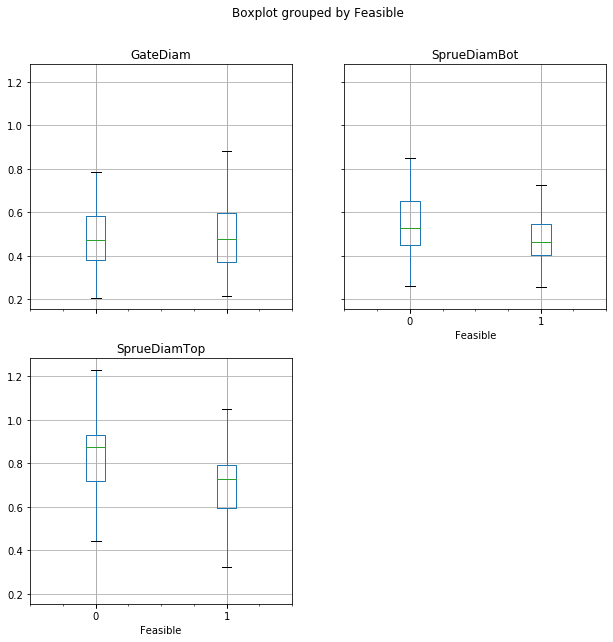

In [3]:
'''
Because pandas won't allow multiple scales for the y-axis,
we must divide and conquer with our boxplots. First execute
the follwing code to view the boxplots for the variables
with the lowest values
''' 
low_vals = ['GateDiam', 'SprueDiamBot', 'SprueDiamTop']

df.boxplot(column=low_vals, by = 'Feasible', layout=(2,2), figsize=(10,10))
# layout=(2,2) configures how the plots will be outputted into the console
# for more info on df.boxplot() head to the link:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21eab7d0>,
      dtype=object)

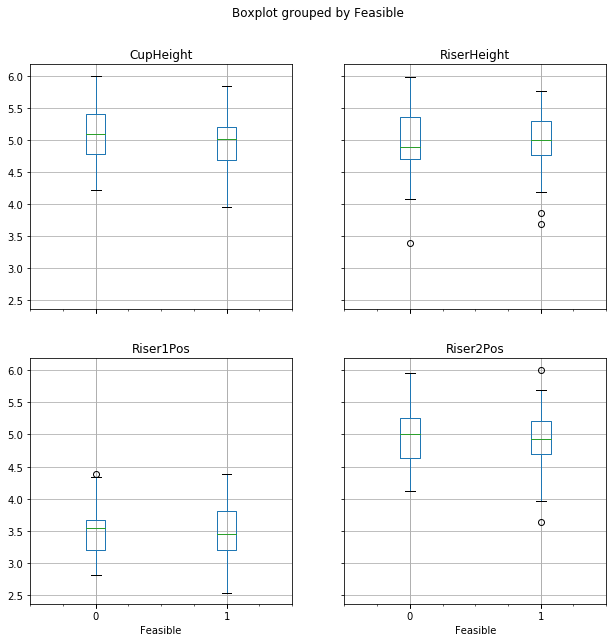

In [4]:
# now do the same for the variables with medium values
med_vals = ['CupHeight', 'RiserHeight', 'Riser1Pos', 'Riser2Pos']

df.boxplot(column=med_vals, by = 'Feasible', layout=(2,2), figsize=(10,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a22521290>,
      dtype=object)

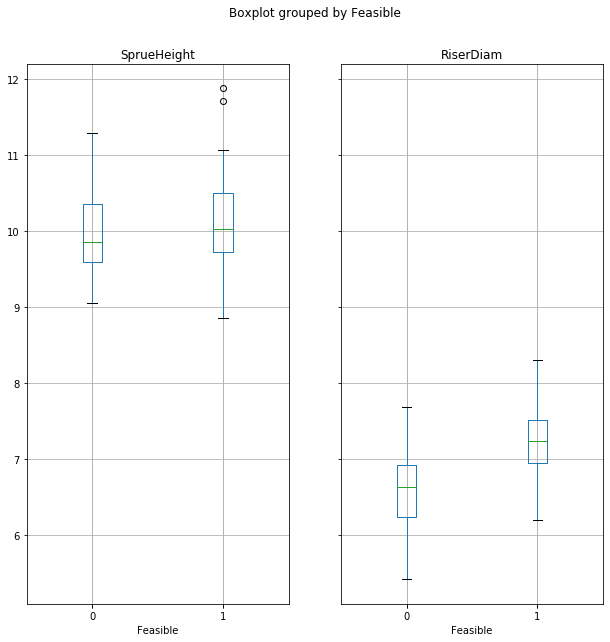

In [5]:
# finally, do the same for the highest values
high_vals = ['SprueHeight', 'RiserDiam']

df.boxplot(column=high_vals, by = 'Feasible', layout=(1,2), figsize=(10,10))

To answer the question below, you will need to know about boxplots. A boxplot uses a box to visualize a collection of observations. In the center of the box is a green line. The height of this line is the median of the observations. The height of the top of the box is 75% quantile (the number such that 75% of the observations are below it). The height of the bottom of the box is the 25% quantile. There are lines coming out of the box (called
“whiskers”) that represent the range of values over which most of the data falls. There may be a few circles above and below the whiskers, which are data that fall outside of this range. These points are called “outliers”.

# Question 1
Which two or three variables appear most related to Feasible? For those variables, are they higher or lower on average when Feasible = 1 rather than 0. Use these observations to make an initial recommendation about the optimal values of the mold-variables in order to maximize the probability of a feasible casting.

Ans: The two variables that seem most related are RiserDiam and SprueDiamTop. For RiserDiam, the middle 50% of data is greater in the feasible (1) category, and the median is lower for SprueDiamTop. Based on this, you want a larger RiserDiam and a smaller SprueDiamTop.

## Logistic Regression

We will fit a logistic regression model to estimate the probability that a casting is feasible
using the mold-variables as predictors. Fit an initial logistic regression model, using the
following commands:

In [6]:
# pull out our dependent/response variable
y = df["Feasible"]
# slice the df to obtain the desired independent variables 
# sm.add_constant allows sm.Logit to fit an incercept 
X = sm.add_constant(df.loc[:, :'Riser2Pos'])
# fit the model and return the regression results
model = sm.Logit(y, X).fit()
results = model.summary()
results

Optimization terminated successfully.
         Current function value: 0.293880
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Feasible   No. Observations:                  100
Model:                          Logit   Df Residuals:                       90
Method:                           MLE   Df Model:                            9
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                  0.5699
Time:                        17:06:53   Log-Likelihood:                -29.388
converged:                       True   LL-Null:                       -68.331
Covariance Type:            nonrobust   LLR p-value:                 4.243e-13
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.9324      9.737     -1.534      0.125     -34.017       4.152
GateDiam        -4.8123      2.709     -1.776      0.076     -10.123       0.498
CupHeight       -0.5460      0.867     -0.630      0.529      -2.245       1.153
SprueHeight     -0.2529      0.663     -0.382      0.703      -1.552       1.046
RiserDiam        5.1473      1.155      4.457      0.000       2.884       7.411
SprueDiamBot   -13.7618      4.284     -3.213      0.001     -22.158      -5.366
SprueDiamTop    -8.8910      2.445     -3.637      0.000     -13.683      -4.099
RiserHeight      0.5067      0.875      0.579      0.562      -1.208       2.221
Riser1Pos       -0.0719      0.839     -0.086      0.932      -1.717       1.573
Riser2Pos       -0.2144      0.766     -0.280      0.780      -1.716       1.287
================================================================================
"""

The `Logit()` function gives the natural log of the odds that y ("Feasible") equals one of the categories (0 or 1). If we were to use the regular values of y, as opposed to $ln(P(Y = y))$, for the response/dependent variable and tried to fit a line, it wouldn’t be a very good representation of the relationship. If you don't believe us, give linear regression a try and see what you find out!

# AIC

AIC stands for Akaike’s Information Criterion. It estimates the quality of a model, relative to each of other models. The lower AIC score is, the better the model is. Therefore, a model with lowest AIC - in comparison to others, is chosen. Execute the code below to print the AIC value of our current model:

In [7]:
print(f'Current model AIC: {model.aic}')
# for those unfamiliar, this is called a Python f-String, it allows you to embed
# variables into a string using brackets

Current model AIC: 78.77595904293287


## Question 2

Interpret the summary output: Which variables appear to be statistically
significant at the 95% level, and how do they affect feasibility? Do the results from the
logistic regression agree or disagree with the results from the boxplots?
What is the value of the AIC for this model?

Ans: The variables RiserDiam, SprueDiamTop and SprueDiamBot are statistically significant at the 95% level. The logictic regression results agree with the boxplots for RiserDiam and SprueDiamTop only. The value of AIC is 78.77.

## Minimum AIC

We are now going to find a model with the minimum AIC.

In [8]:
# this function finds returns a model with the minimum AIC for a logistic regression model
def minAIC(X,y):
    variables = X.columns
    model = sm.Logit(y,X[variables]).fit()
    while True:
        print(f'old model aic: {model.aic}')
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.Logit(y,X[newvariables]).fit()
        print(f'new model aic: {newmodel.aic}')
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables

#select our features
X = sm.add_constant(df.loc[:, :'Riser2Pos'])
# now call the minAIC function on our independent and response variables
new_model, logit_variables = minAIC(X, y)
new_model = sm.Logit(y, X[logit_variables]).fit()
results = new_model.summary()
results

Optimization terminated successfully.
         Current function value: 0.293880
         Iterations 8
old model aic: 78.77595904293287
Optimization terminated successfully.
         Current function value: 0.293917
         Iterations 8
new model aic: 76.78331312043106
old model aic: 76.78331312043106
Optimization terminated successfully.
         Current function value: 0.294335
         Iterations 8
new model aic: 74.86703892578245
old model aic: 74.86703892578245
Optimization terminated successfully.
         Current function value: 0.295176
         Iterations 8
new model aic: 73.03528882927334
old model aic: 73.03528882927334
Optimization terminated successfully.
         Current function value: 0.296468
         Iterations 8
new model aic: 71.29368268744443
old model aic: 71.29368268744443
Optimization terminated successfully.
         Current function value: 0.297922
         Iterations 8
new model aic: 69.58437234068401
old model aic: 69.58437234068401
Optimization terminated s

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Feasible   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 Apr 2020   Pseudo R-squ.:                  0.5640
Time:                        17:10:50   Log-Likelihood:                -29.792
converged:                       True   LL-Null:                       -68.331
Covariance Type:            nonrobust   LLR p-value:                 7.238e-16
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.5546      5.813     -3.192      0.001     -29.947      -7.162
GateDiam        -4.5922      2.598     -1.768      0.077      -9.684       0.500
RiserDiam        5.0380      1.096      4.598      0.000       2.890       7.186
SprueDiamBot   -13.7074      3.905     -3.510      0.000     -21.361      -6.054
SprueDiamTop    -8.6828      2.311     -3.758      0.000     -13.212      -4.154
================================================================================
"""

## Question 3

What has changed compared to the previous model? Has the AIC value decreased (check this below)?

In [10]:
# Your code here to check the new_model's AIC value
print(f'Current model AIC: {new_model.aic}')

Current model AIC: 69.58437234068401


Ans: This new model is analyzing a model with fewer variables. The value of AIC has decreased by approx. 9.

#Multivariate Regression

We will now fit a multivariate regression model for batch time using the same variables as predictors.

Fit a multivariate regression model, using the code below. 

Note that in the linear model, all mold-variables are used, though GateDiam is replaced by a cubic polynomial in GateDiam; this model was suggested by the analysis in the previous lab. Additionally, we have used orthogonal polynomials to avoid colinearity. This will allow us to make inferences about the effect of input variables on batch time. You may recall seeing an error warning or colinearity while doing last week's recitation. Remember, colinearity is a concern for inference but not for prediction.  

Feasible is not used since it is a response, not a mold-variable.

In [11]:
#function to produce orthogonal polynomials
def ortho_poly_fit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' must be less than number of unique points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    return Z, norm2, alpha
#get degree three orthogonal polynomials for 'GateDiam'
Z, norm2, alpha = ortho_poly_fit(df['GateDiam'], degree=3)
df2 = pd.DataFrame(Z, columns = ['const', 'GateDiamOrtho', 'GateDiamSq', 'GateDiamCub'])

#Construct y and X with all orginal variables, higher order 'GateDiam' terms and a constant term.
df2 = pd.DataFrame(Z, columns = ['const', 'GateDiamOrtho', 'GateDiamSq', 'GateDiamCub'])
X = sm.add_constant(pd.concat([df.loc[:, 'CupHeight':'Riser2Pos'], df2.loc[:,'GateDiamOrtho':]], axis=1, sort=False))
y = df["BatchTime"]

linear_model = sm.OLS(y, X).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     40.52
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.01e-29
Time:                        17:14:16   Log-Likelihood:                -309.10
No. Observations:                 100   AIC:                             642.2
Df Residuals:                      88   BIC:                             673.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2921.4901     17.619    165.819      0.000    2886.477    2956.503
CupHeight         1.1435      1.519      0.753      0.454      -1.876       4.162
SprueHeight      -0.8335      1.056     -0.790      0.432      -2.931       1.264
RiserDiam         9.5573      1.141      8.374      0.000       7.289      11.825
SprueDiamBot      4.5050      4.838      0.931      0.354      -5.110      14.120
SprueDiamTop      1.4360      3.480      0.413      0.681      -5.480       8.352
RiserHeight       9.1068      1.381      6.594      0.000       6.362      11.852
Riser1Pos        -0.7958      1.560     -0.510      0.611      -3.895       2.304
Riser2Pos         0.7674      1.263      0.608      0.545      -1.742       3.277
GateDiamOrtho  -107.9668      6.060    -17.816      0.000    -120.010     -95.924
GateDiamSq       28.7212      5.756      4.990      0.000      17.283      40.159
GateDiamCub     -20.0070      5.924     -3.377      0.001     -31.779      -8.235
==============================================================================
Omnibus:                        0.361   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.835   Jarque-Bera (JB):                0.523
Skew:                          -0.102   Prob(JB):                        0.770
Kurtosis:                       2.710   Cond. No.                         483.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Run the code below to the linear model and set of variables with minimal AIC. 

In [12]:
def minAIC_OLS(X,y):
    variables = X.columns
    model = sm.OLS(y,X[variables]).fit()
    while True:
        print(f'old model aic: {model.aic}')
        maxp = np.max(model.pvalues)
        newvariables = variables[model.pvalues < maxp]
        newmodel = sm.OLS(y,X[newvariables]).fit()
        print(f'new model aic: {newmodel.aic}')
        if newmodel.aic < model.aic:
            model = newmodel
            variables = newvariables
        else:
            break
    return model,variables
new_linear_model , linear_variables = minAIC_OLS(X,y)
new_linear_model = sm.OLS(y,X[linear_variables]).fit()
results = new_linear_model.summary()
results

old model aic: 642.1963101522895
new model aic: 640.3896101349596
old model aic: 640.3896101349596
new model aic: 638.7304265932277
old model aic: 638.7304265932277
new model aic: 637.1126377949201
old model aic: 637.1126377949201
new model aic: 635.8088846834007
old model aic: 635.8088846834007
new model aic: 634.6767135122011
old model aic: 634.6767135122011
new model aic: 633.9038579643661
old model aic: 633.9038579643661
new model aic: 643.8367635672666


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BatchTime   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     91.07
Date:                Wed, 29 Apr 2020   Prob (F-statistic):           1.76e-34
Time:                        17:14:21   Log-Likelihood:                -310.95
No. Observations:                 100   AIC:                             633.9
Df Residuals:                      94   BIC:                             649.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2927.0585      9.632    303.896      0.000    2907.934    2946.183
RiserDiam         9.1231      1.075      8.487      0.000       6.989      11.257
RiserHeight       8.9444      1.290      6.933      0.000       6.383      11.506
GateDiamOrtho  -107.5171      5.704    -18.850      0.000    -118.842     -96.192
GateDiamSq       28.5611      5.645      5.059      0.000      17.352      39.770
GateDiamCub     -19.6789      5.701     -3.452      0.001     -30.999      -8.359
==============================================================================
Omnibus:                        1.076   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.584   Jarque-Bera (JB):                1.125
Skew:                          -0.160   Prob(JB):                        0.570
Kurtosis:                       2.591   Cond. No.                         152.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Question 4
What model for predicting BatchTime is selected by minAIC_OLS? Are all variables in that model statistically significant at 0.05?

Ans: The model testing RiserDiam, RiserHeight, GAteDiamOrtho, GateDiamSq and GateDiamCub is the one selected by the minAIC function. All of the variables are statistically significant at 0.05. 

Now we will use the logistic model for `Feasible` and the linear model for `BatchTime`, to inform how to set the values of the mold-variables to minimize expected `BatchTime` and maximize $P(`Feasible = 1)$.

##Question 5
For each of the mold-variables and each of the outcomes $P(Feasible =1)$ and `BatchTime`, state whether increasing the variable would increase the outcome, decrease it, or have no effect, according to the last statistical models that you fit for each.

Hint: Consider the following plot to when trying to understand the effect of `GateDiam` on `BatchTime`. The plot shows how $\beta_{GateDiamOrtho}* X_{GateDiamOrtho} + \beta_{GateDiamSq}*X_{GateDiamSq}+\beta_{GateDiamCub}* X_{GateDiamCub}$ changes as `GateDiam` increases.  

Text(0, 0.5, 'GateDiamPoly')

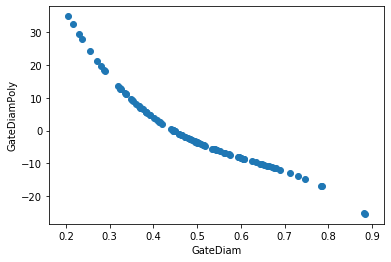

In [13]:
GateDiamPoly = X[['GateDiamOrtho','GateDiamSq','GateDiamCub']].dot(new_linear_model.params[['GateDiamOrtho','GateDiamSq','GateDiamCub']])
plt.scatter(df['GateDiam'],GateDiamPoly)
plt.xlabel('GateDiam')
plt.ylabel('GateDiamPoly')

Ans: Based on the plot, GateDiam seems to decrease BatchTime. RiserDiam and RiserHeight seem to increase BatchTime, since their coefficients from the linear regression are positive. 

## Question 6
Our goal is to set the mold-variables to minimize expected `BatchTime` and
maximize $P(Feasible = 1)$. Based on your answers to question 5, for each variable state whether it should be as large as possible, as small as possible, or the value is unknown. For example, if increasing a variable will increase the probability of feasibility and decrease batch time, then it should be as large as possible. If it would increase the probability of feasibility but increase batch time, then the value is unknown.

Ans: GateDiam: decreases batchtime and coefficient for feasibility < 0, so value is unknown.
RiserDiam: increase BatchTime and feasibility coefficient is > 0, so value is unknown. 
RiserHeight: increases BatchTime and no effect on feasibility, so value should be minimized.
SprueDiamBot: Increases BatchTime and Decreases feasibility, so value should be minimized.
SprueDiamTop: Increases BatchTime and increases feasibility, so value is unknown. 


# Randomized Search for Better Operating Conditions

We now search to find values of the mold-variables that give a low expected `BatchTime` subject to the probability that the casting is feasible being at least 0.95. This problem is best solved by linear programming, but, since linear programming is not a prerequisite for this course, we will use a randomized search.

Now we create a new set called newdata with 1,000,000 rows where the predictors vary uniformly between their smallest and largest values in the original data. The responses `BatchTime` and `Feasible` are not included in this data set. Rather, the expected values of `BatchTime` and `Feasible` are predicted using the logistic model and the linear model, respectively.

In [14]:
upperbounds = df.loc[:, :'Riser2Pos'].max()
lowerbounds = df.loc[:, :'Riser2Pos'].min()
N = 1000000
np.random.seed(10) 
newdata = pd.DataFrame()
for i in range(9):
  newdata[df.columns[i]] = np.random.uniform(lowerbounds[i],upperbounds[i],N)

newdata = sm.add_constant(newdata)
newdata.head()

,const,GateDiam,CupHeight,SprueHeight,RiserDiam,SprueDiamBot,SprueDiamTop,RiserHeight,Riser1Pos,Riser2Pos
0,1.0,0.728633,4.782974,11.296558,7.497856,0.749386,1.049829,3.673499,2.972775,5.886284
1,1.0,0.219408,5.575331,11.519561,5.695499,0.646504,0.903803,4.094723,3.045477,5.443165
2,1.0,0.635229,4.803371,10.851808,7.542823,0.708284,1.077576,5.283172,3.675518,4.762267
3,1.0,0.713357,4.583025,10.377216,7.187206,0.534918,0.532767,4.861789,2.550009,5.292597
4,1.0,0.543542,4.154392,9.184616,6.733361,0.731484,0.352599,4.012132,2.574189,5.855998


In [19]:
df.loc[:,:'Riser2Pos'].max()

GateDiam         0.883781
CupHeight        5.999328
SprueHeight     11.877841
RiserDiam        8.303038
SprueDiamBot     0.849809
SprueDiamTop     1.231756
RiserHeight      5.978733
Riser1Pos        4.387350
Riser2Pos        6.010920
dtype: float64

## Question 7

We define the rande of our new data set using the lines:
```
upperbounds = df.loc[:, :'Riser2Pos'].max()
lowerbounds = df.loc[:, :'Riser2Pos'].min()
```
Why do we define bounds this way?

Ans: We define the bounds like this to get a maximum and minimum for each variable, excluding the constant since the constant is always the same.

Next, use `model.predict()` to compute the probability that `Feasible` is equal to 1, and create a sub-dataset called `newdata_feas` of `newdata` where this probability exceeds 0.95. 

Note: be careful when using `.predict()` for classification problems. Depending on the package it will give the probability of the outcome being 1 or a prediction (0 or 1). For example when using sklearn.LogisiticRegression, `.predict()` gives a 0-1 prediction and `.predict_prob()` gives the probability of the outcome being 1. You will explore sklearns's functionality in homework 8. 

In [90]:
#predict probability of feasible block for each data point and remove points 
#with probability less than 0.95
Yhat = new_model.predict(newdata[logit_variables])
newdata_feas = newdata[pd.Series(Yhat >= 0.95)]
newdata_feas

,const,GateDiam,CupHeight,SprueHeight,RiserDiam,SprueDiamBot,SprueDiamTop,RiserHeight,Riser1Pos,Riser2Pos
13,1.0,0.552827,5.714371,9.632586,7.617059,0.299823,0.927728,5.223513,3.609849,5.023872
19,1.0,0.690135,5.443045,10.061820,7.863853,0.409665,0.816985,4.601488,4.128505,3.997595
20,1.0,0.573419,5.709910,10.612042,6.771296,0.411988,0.494410,3.604898,2.962786,4.408541
26,1.0,0.624454,4.644670,9.273356,8.044107,0.368806,0.911719,5.607907,2.948843,4.848981
27,1.0,0.553469,4.546825,9.747550,8.120162,0.486661,0.631431,3.620138,2.748097,5.491828
...,...,...,...,...,...,...,...,...,...,...
999983,1.0,0.356341,4.473072,11.058666,8.165541,0.516948,0.692722,4.562091,3.210236,4.061553
999984,1.0,0.298256,4.039474,10.236452,8.286895,0.554465,0.604284,5.612515,2.739200,4.620359
999985,1.0,0.535725,5.720329,9.846355,7.538301,0.334773,0.740498,5.440908,3.786614,5.524420
999997,1.0,0.235150,4.738454,9.203041,7.611928,0.628735,0.532466,4.849823,2.903365,5.327310


Now, predict the value of `BatchTime` for all rows of newdata_feas and find the row where `BatchTime` is minimized; this is the single row of the dataset. 

First we apply the function `ortho_poly_predict` to the `GateDiam` values in our new set so we generate the higher order terms used by the linear regression model. 

In [91]:
def ortho_poly_predict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
      for i in np.arange(1,degree):
          Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z /= np.sqrt(norm2)
    return Z

Z = ortho_poly_predict(newdata_feas['GateDiam'], alpha, norm2, degree = 3)
Z = pd.DataFrame(Z, columns = ['-', 'GateDiamOrtho', 'GateDiamSq', 'GateDiamCub'])
#Construct X with all orginal variables, higher order 'GateDiam' terms
newdata_feas = newdata_feas.reset_index(drop=True)
X = sm.add_constant(pd.concat([newdata_feas.loc[:, 'CupHeight':'Riser2Pos'], Z.loc[:,'GateDiamOrtho':]], axis=1, sort=False))
#predict batchtime
exBatchTime = new_linear_model.predict(X[linear_variables])
exBatchTime.min()
X

,const,CupHeight,SprueHeight,RiserDiam,SprueDiamBot,SprueDiamTop,RiserHeight,Riser1Pos,Riser2Pos,GateDiamOrtho,GateDiamSq,GateDiamCub
0,1.0,5.714371,9.632586,7.617059,0.299823,0.927728,5.223513,3.609849,5.023872,0.046077,-0.073536,-0.036954
1,1.0,5.443045,10.061820,7.863853,0.409665,0.816985,4.601488,4.128505,3.997595,0.141397,0.033252,-0.115584
2,1.0,5.709910,10.612042,6.771296,0.411988,0.494410,3.604898,2.962786,4.408541,0.060372,-0.066299,-0.058216
3,1.0,4.644670,9.273356,8.044107,0.368806,0.911719,5.607907,2.948843,4.848981,0.095801,-0.035011,-0.100923
4,1.0,4.546825,9.747550,8.120162,0.486661,0.631431,3.620138,2.748097,5.491828,0.046522,-0.073358,-0.037635
...,...,...,...,...,...,...,...,...,...,...,...,...
259586,1.0,4.473072,11.058666,8.165541,0.516948,0.692722,4.562091,3.210236,4.061553,-0.090326,0.013183,0.072132
259587,1.0,4.039474,10.236452,8.286895,0.554465,0.604284,5.612515,2.739200,4.620359,-0.130649,0.092824,-0.002964
259588,1.0,5.720329,9.846355,7.538301,0.334773,0.740498,5.440908,3.786614,5.524420,0.034205,-0.077193,-0.018587
259589,1.0,4.738454,9.203041,7.611928,0.628735,0.532466,4.849823,2.903365,5.327310,-0.174458,0.207279,-0.184751


##Question 8 
What is the expected value of BatchTime under optimal conditions? “Optimal
conditions” means that the predictors are set to their optimal values.




Ans: The expected value of BatchTime under optimal conditions is 2994.49. 


In [67]:
#your code here
m = np.argmin(exBatchTime)
row = X.iloc[m, 1:]
row

CupHeight         4.163599
SprueHeight      11.080075
RiserDiam         6.704074
SprueDiamBot      0.280814
SprueDiamTop      0.326616
RiserHeight       3.430971
Riser1Pos         3.254005
Riser2Pos         4.520579
GateDiamOrtho     0.269224
GateDiamSq        0.392622
GateDiamCub       0.339652
Name: 133193, dtype: float64

##Question 9
What are the “optimal” values of the variables, where “optimal” means mini-
mizing the expected `BatchTime` subject to $P(Feasible = 1) > 0.95$. Compare these results with your answer to Problem 5. You may also want to look at the maximum and minimum values for each variable. 

Ans: The optimal values are shown above. Compared to Problem 5, the results for SprueDiamBot were similar, as it's value is one of the smallest of the variables listed. The maximum value is SprueHeight, and the minimum is GateDiamOrtho.

In [94]:
#your code here
Y = new_model.predict(newdata[logit_variables])
Y[m]

0.9995034384921853

##Question 10 

What is the probability that Feasible will equal 1 under optimal conditions?
Hint: Use predict again.


Ans: The probability that feasibility will equal 1 under optimal conditions is .9995

In [0]:
#your code here